<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br><b>Introduction to Jupyter Notebooks for Data Preview 0.2</b> <br>
Contact author: Melissa Graham <br>
Last verified to run: 2024-01-31 <br>
LSST Science Pipelines version: Weekly 2024_04 <br>
Container size: medium <br>
Targeted learning level: beginner <br>

**Description:** An introduction to using Jupyter Notebooks and Rubin Python packages to access LSST data products (images and catalogs). **Adapted to use the CC-IN2P3 butler.** 

**Skills:** Execute Python code in a Jupyter Notebook. Use the TAP service to retrieve Object catalog data. Use the Butler to retrieve and display a deepCoadd image.

**LSST Data Products:** TAP dp02_dc2_catalogs**_frdf**.Object table. Butler deepCoadd image. To use the catalog produced by the IDF, use dp02_dc2_catalogs (without _frdf` extension). 

**Packages:** lsst.rsp.get_tap_service, lsst.rsp.retrieve_query, lsst.daf.butler, lsst.afw.display, lsst.geom, pandas, matplotlib

**Credit:** Originally developed by Melissa Graham and the Rubin Community Science Team in the context of the Rubin DP0.1.

**Get Support:**
Find DP0-related documentation and resources at <a href="https://dp0-2.lsst.io">dp0-2.lsst.io</a>. Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1.0. Introduction

This Jupyter Notebook provides an introduction to how notebooks work. It demonstrates how to execute code and markdown text cells, how to import Python packages and learn about their modules, and provides links to further documentation.

This Notebook also demonstrates the basic functionality of the Rubin Science Platform (RSP) installed at the Interim Data Facility (IDF; the Google Cloud), such as how to use the TAP service to query and retrieve catalog data; matplotlib to plot catalog data; the LSST Butler package to query and retrieve image data; and the LSST afwDisplay package to display images.

This Notebook uses the Data Preview 0.2 (DP0.2) data set. This data set uses a subset of the DESC's Data Challenge 2 (DC2) simulated images, which have been *reprocessed* by Rubin Observatory using Version 23 of the LSST Science Pipelines. More information about the simulated data can be found in the <a href="https://ui.adsabs.harvard.edu/abs/2021ApJS..253...31L/abstract">DESC's DC2 paper</a> and in the <a href="https://dp0-2.lsst.io">DP0.2 data release documentation</a>.

### 1.1. How to use a Jupyter Notebook

Jupyter Notebooks contain a mix of code, output, visualizations, and narrative text. The most comprehensive source for documentation about Jupyter Notebooks is https://jupyter-notebook.readthedocs.io, but there are many great beginner-level tutorials and demos out there. Usually a web search of a question, like "how to make a table in markdown jupyter notebook", will yield several good examples. Often the answers will be found in <a href="https://stackoverflow.com/">StackOverflow</a>.

A Jupyter Notebook is a series of cells. There are three types of cells: code, markdown, and raw. This text was generated from a markdown cell. Up in the menu bar you will find a drop-down menu to set the cell type.

> **Warning:** All of the code cells in a notebook should be executed in the order that they appear.

Click in the following code cell: with the cursor in the cell, simultaneously press "shift" and "enter" (or "return") to execute the cell code.

In [34]:
# This is a code cell. Press shift-enter to execute.
# The # makes these lines comments, not code. They are not executed.
print('Hello, world!')

Hello, world!


<!---
This is a markdown cell.
Press shift-enter to execute, and see the formatted text reappear.
-->

Double click on THESE WORDS IN THIS MARKDOWN CELL to see the markdown source code.

#### 1.1.1. Jupyter Notebooks How-Tos

**How to quickly execute all the cells:** 
Go to the top menu bar and select "Kernel", then "Restart Kernel and Run All Cells".

**How to emergency-stop a notebook:** 
If a code cell is taking a long time to execute (e.g., if a process to retrieve an entire catalog was started by accident)
kill it by going to "Kernel" in the top menu bar and selecting "Restart Kernel and Clear All Outputs".
It might still a few tens of seconds, but it will stop the process and restart the kernel.

**The kernel** is the computational engine for the notebook (the RSP uses a `python3` kernel),
and can be thought of as a live compiler. 
Restarting the kernel and clearning all outputs means that all defined variables or functions are removed from memory, 
and all code cells revert to an "unexecuted" state.

**How to view a table of contents for this notebook:** 
Click on the icon of a bullet list in the leftmost vertical menu bar, and an automatically-generated ToC will appear at left. 
Click on the icon of the file folder at the top of the leftmost vertical menu bar to return to a directory view.

**How to know which version of the LSST Science Pipelines is running:** 
Look along the bottom bar of this browser window, and find the version of the LSST Science Pipelines that was selected as the "image". 
It is probably "Recommended (Weekly yyyy_ww)", and it should match the verified version listed in the notebook's header. 
Alternatively, uncomment the two lines in the following code cell and execute the cell.

In [35]:
# ! echo $IMAGE_DESCRIPTION
# ! eups list -s | grep lsst_distrib

### 1.2. Package Imports

Most Jupyter Notebooks start out by importing all the packages they will need in the first code cell.

Complete knowledge of these packages is not required in order to complete this tutorial, but here is a bit of basic information and some links for further learning.

**numpy**: A fundamental package for scientific computing with arrays in Python. Its comprehensive documentation is available at <a href="https://numpy.org">numpy.org</a>, and it includes quickstart beginner guides. (The numpy package is not used in this notebook, but is imported as a demonstration because it is a very commonly-used package.) <br>

**matplotlib**: This package is a comprehensive library for creating static, animated, and interactive visualizations in Python. Its comprehensive documentation is at <a href="https://matplotlib.org/">matplotlib.org</a>. The <a href="https://matplotlib.org/stable/gallery/index.html">matplotlib gallery</a> is a great place to start and links to examples. <br>
 
**pandas**: A package which allows users to deal efficiently with tabular data in dataframes. Learn more in the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">Pandas documentation</a>. <br>

**astropy**: A Python package of useful astronomy tools. Learn more in the <a href="http://docs.astropy.org/en/stable/_modules/astropy/table/table.html">astropy documentation</a>.
 
**lsst**: These packages are all from the <a href="https://pipelines.lsst.io/">LSST Science Pipelines</a>.
The `lsst.rsp` package enables image and catalog access via the TAP service (see Section 2); 
the `lsst.daf.butler` package enables image and catalog access via the butler (see Section 3);
and the `lsst.geom` has helper functions for image metadata and `lsst.afw.display` package enables image display (see Section 3).

Import the packages used in this notebook by executing the following cell.

In [36]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
from lsst.rsp import get_tap_service, retrieve_query
import lsst.daf.butler as dafButler
import lsst.geom
import lsst.afw.display as afwDisplay

#### 1.2.1. Learn more about the imported Python packages

Print the version of numpy and matplotlib.

In [37]:
print('numpy version: ', numpy.__version__)
print('matplotlib version: ', matplotlib.__version__)

numpy version:  1.24.4
matplotlib version:  3.8.2


View a pop-up list of any package's modules by writing the package name, then a period, and then pressing tab. Use the up and down arrows to scroll through the pop-up list. This works whether or not the line is commented-out. In the cell below, `numpy.` is commented-out because that is not an executable code statement, and if the # were not there, this cell would fail to execute (try it -- remove the #, press shift-enter, and watch it fail).

In [38]:
# numpy.

Use "help" function to view the help documentation for a package. Remove the # symbol to un-comment any one line, and execute the following cell. Help documentation can be really long. Re-comment the line by replacing the #, then re-execute the cell and the output will go away.

In [39]:
# help(numpy)
# help(matplotlib)
# help(numpy.abs)
# help(matplotlib.pyplot)

## 2.0. Catalog Data

### 2.1. Table Access Protocol (TAP) service

Table Access Procotol (TAP) provides standardized access to the catalog data for discovery, search, and retrieval. Full <a href="http://www.ivoa.net/documents/TAP">documentation for TAP</a> is provided by the International Virtual Observatory Alliance (IVOA).

The TAP service uses a query language similar to SQL (Structured Query Langage) called ADQL (Astronomical Data Query Language). The <a href="http://www.ivoa.net/documents/latest/ADQL.html">documentation for ADQL</a> includes more information about syntax and keywords.

> **Notice:** Not all ADQL functionality is supported by the RSP for Data Preview 0. 

Start the TAP service.

In [40]:
service = get_tap_service("tap")

### 2.2. Exploring catalog tables and columns with TAP

This example uses the DP0.2 Object catalog, which contains sources detected in the coadded images (also called stacked, combined, or deepCoadd images). 

Catalog contents can also be explored with the <a href="https://dm.lsst.org/sdm_schemas/browser/dp02.html">DP0.2 schema browser</a>.

Results from a TAP service search are best displayed using one of two functions:<br>
`.to_table()`: convert results to an astropy table. <br>
`.to_table().to_pandas()`: convert to an astropy table and then to a Pandas dataframe.

> **Warning:** do not use the .to_table().show_in_notebook() method. This can cause issues in the RSP Jupyterlab environment that make your notebook hang indefinitely.

The three optional exercises below teach different ways to explore using the TAP service. They show how to use the TAP service with ADQL statements to discover what catalogs exist and which columns they contain. Each cell uses a different method to display the TAP search results. Remove all of the # and execute each cell, and see that they create a lot of output -- add the # back to each line and re-execute the cell, and the output will go away.

#### 2.2.1. Exercise 1
Retrieve and display a list of all the table names and descriptions that are available via the TAP server.

In [41]:
# my_adql_query = "SELECT description, table_name FROM TAP_SCHEMA.tables"
# results = service.search(my_adql_query)
# results_table = results.to_table().to_pandas()
# results_table

#### 2.2.2. Exercise 2
Retrieve and display a list of the field names (columns names) in the DP0.2 Object catalog's TAP schema. Note that the results can be named anything else; here, 'res' is used instead.

In [42]:
# my_adql_query = "SELECT * from TAP_SCHEMA.columns "+\
#                 "WHERE table_name = 'dp02_dc2_catalogs_frdf.Object'"
# res = service.search(my_adql_query)
# print(res.fieldnames)

#### 2.2.3. Exercise 3
Retrieve the names, data types, description, and units for all columns in the Object catalog. Display the number of columns.

In [43]:
# my_adql_query = "SELECT column_name, datatype, description, unit "+\
#                 "FROM TAP_SCHEMA.columns "+\
#                 "WHERE table_name = 'dp02_dc2_catalogs_frdf.Object'"
# results = service.search(my_adql_query)
# results_table = results.to_table().to_pandas()
# print('Number of columns available in the Object catalog: ', len(results_table))

Display all 991 column names and their information. It's so much output! Comment-out the line in the cell and re-execute the cell to make all that output disappear.

In [44]:
# results_table

Only display names and descriptions for columns that contain the string "cModelFlux". 
Try other strings like "coord", "extendedness", "deblend", or "detect".

In [45]:
# my_string = 'cModelFlux'
# for col,des in zip(results_table['column_name'],results_table['description']):
#     if col.find(my_string) > -1:
#         print('%-40s %-200s' % (col,des))

### 2.3. Retrieving data with TAP

A few tips about how to do efficient queries on the DP0.2 catalogs.

**RA, Dec constraints yield faster queries:**
LSST Query Services (Qserv) provides access to the LSST Database Catalogs.
Users can query the catalogs using standard SQL query language with a few restrictions.
Qserv stores catalog data sharded by coordinate (RA, Dec).
ADQL query statements that include constraints by coordinate do not require a whole-catalog search, and are typically faster (and can be much faster) than ADQL query statements which only include constraints for other columns.

**Retrieve a small sample of rows:**
As demonstrated in Section 2.3.2, use `maxrec=10` or `SELECT TOP 10` when exploring data sets in order to return only a few rows to play with (this can also shorten query times for exploratory queries without WHERE statements).

**Recommended constraint on `detect_isPrimary`:**
When applicable, it is recommended to include `detect_isPrimary = True` in queries for the `Object`, `Source`, and `ForcedSource` catalogs.
This parameter is `True` if a source has no children, is in the inner region of a coadd patch, is in the inner region of a coadd tract, and is not detected in a pseudo-filter.
Including this constraint will remove any duplicates (i.e., will not include both a parent and its deblended children).

#### 2.3.1. Converting fluxes to magnitudes

The object and source catalogs store only fluxes. There are hundreds of flux-related columns, and to store them also as magnitudes would be redundant, and a waste of space.

All flux units are nanojanskys ($nJy$). The <a href="https://en.wikipedia.org/wiki/AB_magnitude">AB Magnitudes Wikipedia page</a> provides a concise resource for users unfamiliar with AB magnitudes and jansky fluxes. To convert $nJy$ to AB magnitudes use: $m_{AB} = -2.5log( f_{nJy}) + 31.4$.

As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:<br>
`results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4`<br>
`results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4`

As demonstrated in Section 2.3.3, to retrieve columns of fluxes *as magnitudes* in an ADQL query, users can do this:<br>
`scisql_nanojanskyToAbMag(g_calibFlux) as g_calibMag`,
and columns of magnitude errors can be retrieved with:<br>
`scisql_nanojanskyToAbMagSigma(g_calibFlux, g_calibFluxErr) as g_calibMagErr`.

#### 2.3.2. Ten objects of any kind

To quickly demonstrate how to retrieve data from the Object catalog,  use a cone search and request only 10 records be returned. Figure 2 of the <a href="https://ui.adsabs.harvard.edu/abs/2021ApJS..253...31L/abstract">DESC's DC2 paper</a> shows the sky region covered by the DC2 simulation contains coordinates RA,Dec = 62,-37.

This example uses `maxrec=10` in the `service.search()` function, but the same results could be achieved by replacing `SELECT` with `SELECT TOP 10` in the ADQL query.

> **Warning:** The Object catalog contains hundreds of millions of rows. Searches that do not specify a region and/or a maximum number of records can take a long time, and return far too many rows to display in a notebook.

Retrieve coordinates and g,r,i magnitudes for 10 objects within a radius 0.5 degrees of 62,-37.

In [46]:
use_center_coords = "62, -37"

Below, `SELECT TOP 10` is used in the query statement to limit the returned data to 10 objects.
An alternative is to use the `maxrec` keyword in the search statement: `service.search(my_adql_query, maxrec=10)`.
However, use of `maxrec` might return a `DALOverflowWarning` to warn the user that partial results have been returned (even though partial results were desired).

In [47]:
my_adql_query = "SELECT TOP 10 "+ \
                "coord_ra, coord_dec, detect_isPrimary, " + \
                "r_calibFlux, r_cModelFlux, r_extendedness " + \
                "FROM dp02_dc2_catalogs_frdf.Object " + \
                "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), " + \
                "CIRCLE('ICRS', " + use_center_coords + ", 0.01)) = 1 "

results = service.search(my_adql_query)
results_table = results.to_table()

In [48]:
results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4

In [49]:
results_table

coord_ra,coord_dec,detect_isPrimary,r_calibFlux,r_cModelFlux,r_extendedness,r_calibMag,r_cModelMag
deg,deg,,nJy,nJy,,,
float64,float64,bool,float64,float64,float64,float64,float64
61.9977717,-37.0095627,True,60.9412305,38.2828299,1.0,26.9377219523278,27.442489915709217
62.0097771,-37.0037115,True,114.0353819,42.5032456,1.0,26.257400946662255,27.32894476355941
61.9925699,-37.00516,False,83.0369135,31.7365711,--,26.60182200503813,27.646099993322174
61.9961625,-37.0056342,True,117.0598308,45.7561649,1.0,26.228980269892528,27.24887595882025
61.9956616,-37.0035827,True,115.0207068,46.1942447,--,26.24805991999743,27.238530323595082
61.9958399,-37.0015937,False,79.4710223,41.575753,--,26.64947800066548,27.352899690762182
61.9996432,-37.0073417,True,239.7739851,111.2072639,1.0,25.45049484646662,26.284667110826998
62.0054597,-37.0085691,True,186.7704788,103.708885,1.0,25.721729419668584,26.360460087301878


#### 2.3.2. Ten thousand point-like objects

In addition to a cone search, impose query restrictions that detect_isPrimary is True (this will not return deblended "child" sources), that the calibrated flux is greater than 360 nJy (about 25th mag), and that the extendedness parameters are 0 (point-like sources).

Retrieve g-, r- and i-band magnitudes for 10000 objects that are likely to be stars.

In [50]:
results = service.search("SELECT TOP 10000 "
                         "coord_ra, coord_dec, "
                         "scisql_nanojanskyToAbMag(g_calibFlux) as g_calibMag, "
                         "scisql_nanojanskyToAbMag(r_calibFlux) as r_calibMag, "
                         "scisql_nanojanskyToAbMag(i_calibFlux) as i_calibMag, "
                         "scisql_nanojanskyToAbMagSigma(g_calibFlux, g_calibFluxErr) as g_calibMagErr "
                         "FROM dp02_dc2_catalogs_frdf.Object "
                         "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), "
                         "CIRCLE('ICRS', "+use_center_coords+", 1.0)) = 1 "
                         "AND detect_isPrimary = 1 "
                         "AND g_calibFlux > 360 "
                         "AND r_calibFlux > 360 "
                         "AND i_calibFlux > 360 "
                         "AND g_extendedness = 0 "
                         "AND r_extendedness = 0 "
                         "AND i_extendedness = 0")

results_table = results.to_table()
print(len(results_table))

10000


The table display will automatically truncate.

In [51]:
results_table

coord_ra,coord_dec,g_calibMag,r_calibMag,i_calibMag,g_calibMagErr
deg,deg,,,,
float64,float64,float64,float64,float64,float64
61.9828364,-36.5516892,22.28982720681458,21.66937210824853,21.421343563328218,0.008042623291929531
62.1223198,-37.0486043,18.915381157519043,18.45230094306352,18.275145579011337,0.0005576588153186947
62.4055925,-37.0097987,23.229861212511928,22.022925310928713,21.185858544234677,0.02139239698446953
62.198354,-37.0584631,20.258159956191506,19.805636199547678,19.640462901545582,0.0015533641553563322
62.4003929,-37.0498979,20.83171593379923,19.642031649895664,18.573105873156344,0.002513477879758885
62.091562,-37.0571668,23.765043322468575,23.270289160214475,23.065761108862596,0.0339384285042901
62.2935735,-37.0040459,21.59364292469961,20.342394280320693,19.414555694375384,0.004549662262064335
62.2392356,-37.0560203,22.73490031503108,22.370818949774517,22.242179051602232,0.012652127041277736


Put the results into a pandas dataframe for easy access to contents. This data is used to create a color-magnitude diagram in Section 2.5.

In [52]:
data = results_table.to_pandas()

For users unfamiliar with Pandas, here are some optional lines of code that demonstrate how to print the column names, the 'ra' column info, or the 'ra' column values. Uncomment (remove #) and execute the cell to view the demo output.

In [53]:
# data.columns

In [54]:
# data['coord_ra']

In [55]:
# data['coord_ra'].values

### 2.5 Make a color-magnitude diagram

Use the plot task of the matplotlib.pyplot package (which was imported as plt). The plot task parameters are described in full at <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot">this matplotlib website</a>, but briefly they are: x values, y values, symbol shape ('o' is circle), marker size (ms), and marker transparency (alpha).

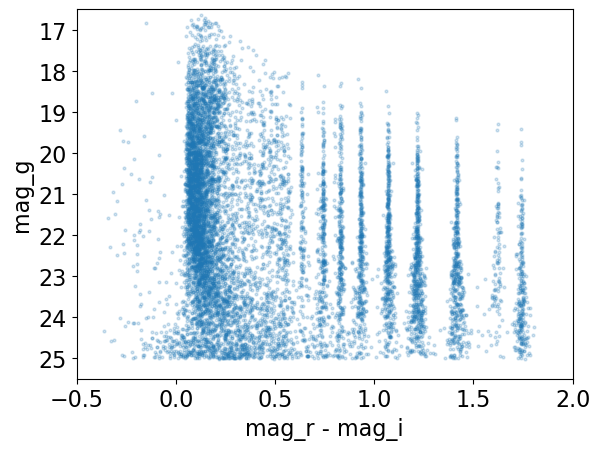

In [56]:
plt.plot(data['r_calibMag'].values - data['i_calibMag'].values,
         data['g_calibMag'].values, 'o', ms=2, alpha=0.2)

plt.xlabel('mag_r - mag_i', fontsize=16)
plt.ylabel('mag_g', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim([-0.5, 2.0])
plt.ylim([25.5, 16.5])

plt.show()

This plot generates many questions, such as "Why are the colors quantized?" and "Are those all really stars?". The answers are beyond the scope of this notebook, and are left as potential topics of scientific analysis that could be done with the DC2 data set.

### 2.6 Optional: plot magnitude versus magnitude error

To illustrate both the magnitudes and magnitude errors retrieved via the TAP query above,
here is an option to plot the magnitude error as a function of magnitude.

In [57]:
# plt.plot(data['g_calibMag'].values, data['g_calibMagErr'].values, 'o', ms=2, alpha=0.2)
# plt.show()

## 3.0. Image Data

The two most common types of images that DP0 delegates will interact with are calexps and deepCoadds.

**calexp**: A single image in a single filter.

**deepCoadd**: A combination of single images into a deep stack or Coadd.
 
The LSST Science Pipelines processes and stores images in tracts and patches.

**tract**: A portion of sky within the LSST all-sky tessellation (sky map); divided into patches.

**patch**: A quadrilateral sub-region of a tract, of a size that fits easily into memory on desktop computers.
 
To retrieve and display an image at a desired coordinate, users have to specify their image type, tract, and patch.

### 3.1. Create an instance of the butler

The butler (<a href="https://pipelines.lsst.io/modules/lsst.daf.butler/index.html">documentation</a>) is an LSST Science Pipelines software package to fetch LSST data without having to know its location or format. The butler can also be used to explore and discover what data exist. Other tutorials demonstrate the full butler functionality.

Create an instance of the butler using the following DP0.2 configuration and collection.
It will return an informative statement about credentials being found.

In [58]:
butler = dafButler.Butler('/sps/lsst/dataproducts/rubin/previews/dp0.2/', collections='2.2i/runs/FRDF/DP0.2/PREOPS-1145/step_all')

### 3.2. Identify and retrieve a deepCoadd

There is a cool-looking DC2 galaxy cluster at RA = 03h42m59.0s, Dec = -32d16m09s (in degrees, 55.745834, -32.269167).

Use lsst.geom to define a SpherePoint for the cluster's coordinates (<a href="https://pipelines.lsst.io/modules/lsst.geom/index.html">lsst.geom documentation</a>).

In [59]:
my_ra_deg = 55.745834
my_dec_deg = -32.269167

my_spherePoint = lsst.geom.SpherePoint(my_ra_deg*lsst.geom.degrees,
                                       my_dec_deg*lsst.geom.degrees)
print(my_spherePoint)

(55.7458340000, -32.2691670000)


Retrieve the DC2 sky map from the butler and use it to identify the tract and patch for the cluster's coordinates (<a href="http://doxygen.lsst.codes/stack/doxygen/x_masterDoxyDoc/skymap.html">skymap documentation</a>).

In [60]:
skymap = butler.get('skyMap')

tract = skymap.findTract(my_spherePoint)
patch = tract.findPatch(my_spherePoint)

my_tract = tract.tract_id
my_patch = patch.getSequentialIndex()

print('my_tract: ', my_tract)
print('my_patch: ', my_patch)

my_tract:  4431
my_patch:  17


Use the butler to retrieve the deep i-band Coadd for the tract and patch.

In [61]:
dataId = {'band': 'i', 'tract': my_tract, 'patch': my_patch}
my_deepCoadd = butler.get('deepCoadd', dataId=dataId)

### 3.3. Display the image with afwDisplay
Image data retrieved with the butler can be displayed several different ways. A simple option is to use the LSST Science Pipelines package afwDisplay. There is some <a href="https://pipelines.lsst.io/modules/lsst.afw.display/index.html">documentation for afwDisplay</a> available, and other DP0 tutorials go into more detail about all the display options (e.g., overlaying mask data to show bad pixels).

Set the backend of afwDisplay to matplotlib.

In [62]:
afwDisplay.setDefaultBackend('matplotlib')

Use afwDisplay to show the image data retrieved.

The following code cell creates a matplotlib.pyplot figure; aliases `lsst.afw.display.Display` as `afw_display`; 
sets the scale for the pixel shading; displays the image data using `mtv`; and turns on the x and y axes labels (pixel coordinates).

(11899.5, 16099.5, 7899.5, 12099.5)

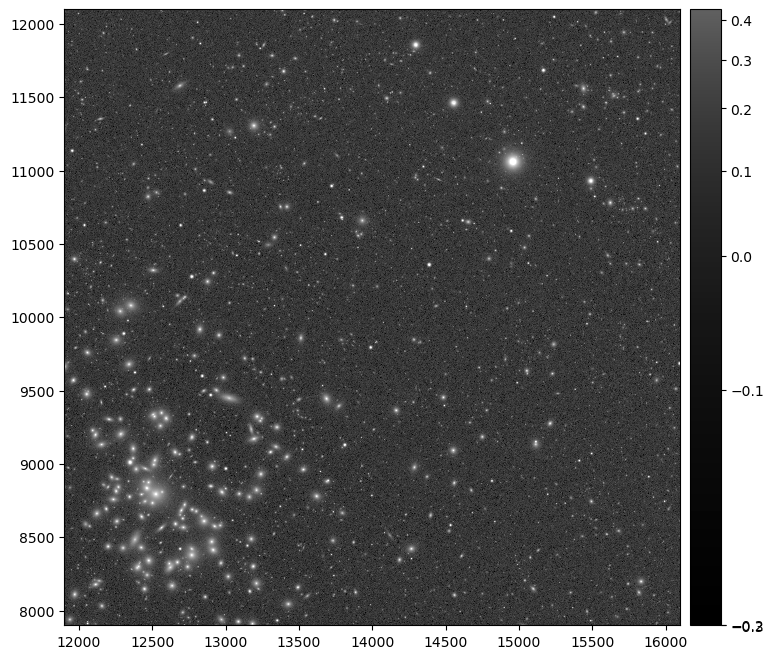

In [63]:
fig = plt.figure(figsize=(10, 8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(my_deepCoadd.image)
plt.gca().axis('on')

To learn more about the afwDisplay package and its tasks, use the help function.

In [64]:
# help(afw_display.scale)
# help(afw_display.mtv)